# Dataset 1: Images of Flowers

## Preprocessing

This dataset is provided in the form of about 4000 labeled images of different sizes of 5 types of flowers. Our goal for the assignment is to predict the type of flower based on the image. This proves to be much more difficult than our toy datasets from class. Most of the components carry some energy, so any substantial PCA greatly reduces the energy content of the data. In addition, going through the pictures by inspection, they all contain different lighting, background, and size of flower. We believe that more advanced methods are necessary to classify these images with substantial accuracy. In the preprocessing stage, we experiment with different degrees of image size reduction, as well as different #s of PCA features. We can't find a balance between computational complexity and accuracy of classification.

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glob
from skimage.io import imread

daisy,dandelion,rose,sunflower,tulip = [],[],[],[],[]

for filename in glob.glob('flowerscomp2/daisy/*.jpg'): # for daisies
    im = imread(filename,True).flatten()
    daisy.append(im)    

for filename in glob.glob('flowerscomp2/dandelion/*.jpg'): # for dandelion
    im = imread(filename,True).flatten()
    dandelion.append(im)
    
for filename in glob.glob('flowerscomp2/rose/*.jpg'): # for roses
    im = imread(filename,True).flatten()
    rose.append(im)
    
for filename in glob.glob('flowerscomp2/sunflower/*.jpg'): # for sunflowers
    im = imread(filename,True).flatten()
    sunflower.append(im)
    
for filename in glob.glob('flowerscomp2/tulip/*.jpg'): # for tulip
    im = imread(filename,True).flatten()
    tulip.append(im)
    
daisy_arr=np.asarray(daisy)
dandelion_arr=np.asarray(dandelion)
rose_arr=np.asarray(rose)
sunflower_arr=np.asarray(sunflower)
tulip_arr=np.asarray(tulip)

# daisy = 0, dandelion = 1, rose = 2, sunflower = 3, tulip = 4
daisy_labels=np.zeros((len(daisy_arr),1))
dandelion_labels=np.ones((len(dandelion_arr),1))
rose_labels=2*np.ones((len(rose_arr),1))
sunflower_labels=3*np.ones((len(sunflower_arr),1))
tulip_labels=4*np.ones((len(tulip_arr),1))


# Here are the labels and the dataset 
labels=np.vstack((daisy_labels,dandelion_labels,rose_labels,sunflower_labels,tulip_labels))
dataset=np.vstack((daisy_arr,dandelion_arr,rose_arr,sunflower_arr,tulip_arr))

In [2]:
def normalize(A):
    stds = [np.std(A[r,:]) for r in range(A.shape[0])]
    for r in range(A.shape[0]):
        A[r,:] /= stds[r]
    return A

def centralize(A):
    means = [np.mean(A[r,:]) for r in range(A.shape[0])]
    for r in range(A.shape[0]):
        A[r,:] -= means[r]
    return A

def unisonShuffledCopies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def PCA(A, numComponents):
    # First, center the data
    A = normalize(centralize(A))
    
    # Now, compute the SVD, and reduce the dimensions of A.
    U, Sigma, Vt = np.linalg.svd(A)
    D = np.matmul(A.T, U[:,:numComponents])
    
    return D.T

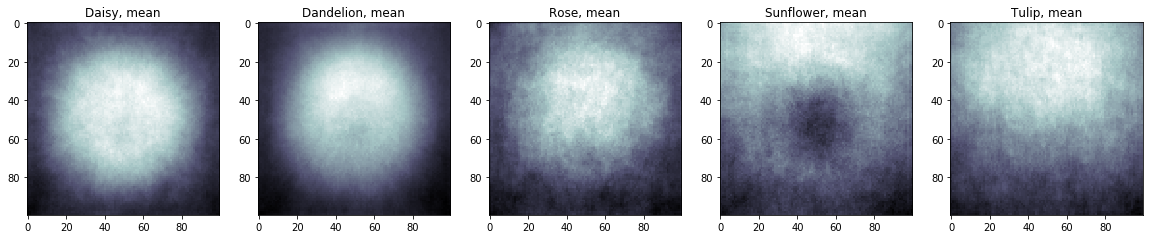

In [3]:
# means of the photos
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,5,1)
plt.imshow(np.reshape(daisy_arr.mean(0),(100,100)),cmap='bone')
plt.title("Daisy, mean")
fig.add_subplot(1,5,2)
plt.imshow(np.reshape(dandelion_arr.mean(0),(100,100)),cmap='bone')
plt.title("Dandelion, mean")
fig.add_subplot(1,5,3)
plt.imshow(np.reshape(rose_arr.mean(0),(100,100)),cmap='bone')
plt.title("Rose, mean")
fig.add_subplot(1,5,4)
plt.imshow(np.reshape(sunflower_arr.mean(0),(100,100)),cmap='bone')
plt.title("Sunflower, mean")
fig.add_subplot(1,5,5)
plt.imshow(np.reshape(tulip_arr.mean(0),(100,100)),cmap='bone')
plt.title("Tulip, mean");

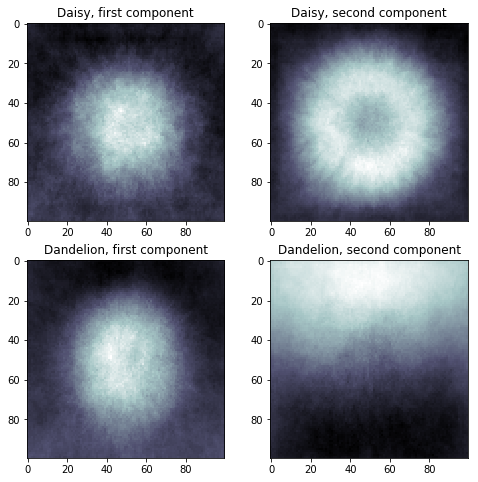

In [4]:
# Printing top principal components 
fig=plt.figure(figsize=(8,8))
centered_daisy = daisy_arr.T-np.reshape(daisy_arr.T.mean(1),(10000,1))
centered_dandelion = dandelion_arr.T-np.reshape(dandelion_arr.T.mean(1),(10000,1))
u1,s1,v1 = np.linalg.svd(centered_daisy)
u2,s2,v2 = np.linalg.svd(centered_dandelion)
component1,component2 = u1[:,[0]],u1[:,[1]]
component3,component4 = u2[:,[0]],u2[:,[1]]
fig.add_subplot(221)
plt.imshow(np.reshape(component1,(100,100)),cmap='bone')
plt.title("Daisy, first component")
fig.add_subplot(222)
plt.imshow(np.reshape(component2,(100,100)),cmap='bone')
plt.title("Daisy, second component");
fig.add_subplot(223)
plt.imshow(np.reshape((component3),(100,100)),cmap='bone')
plt.title("Dandelion, first component")
fig.add_subplot(224)
plt.imshow(np.reshape((component4),(100,100)),cmap='bone')
plt.title("Dandelion, second component");


In [5]:
# Centering the dataset 
mean=np.reshape(dataset.T.mean(1),(len(dataset.T),1))
centered=dataset.T-mean

i = 0
stds = [np.std(row) for row in centered]
normalized_samples=[]
for row in centered:
    normalized_samples.append(row/stds[i])
    i+=1

# Here I used centered to mean centered and normalized
centered = np.asarray(normalized_samples)

U,S,V=np.linalg.svd(centered)

# Determining Variation
total_s = 0
fnorm = np.linalg.norm(centered,'fro')
for k in range(2,12):
    total_s += S[k]**2
    print(k,(total_s/fnorm**2)*100)


2 6.21766306099638
3 9.842658987696348
4 12.070532853655315
5 14.069751260088847
6 15.731709839135727
7 17.32501930902247
8 18.77695476656083
9 19.793887733860906
10 20.7495526531808
11 21.607182084111667


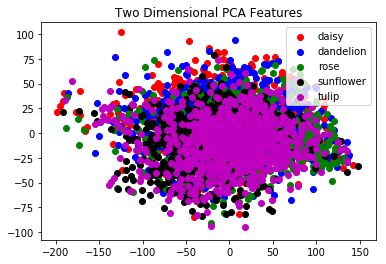

In [6]:
# Visualization of the datapoints 


p2c = (U[:,[0,1]].T@centered).T
points = [p2c[0:768],p2c[768:1820],p2c[1820:2603],p2c[2603:3337],p2c[3337:4321]]
colors = ['r','b','g','k','m']
which_flower = ['daisy','dandelion','rose','sunflower','tulip']
fig = plt.figure()

for i in range(5):
    x,y = points[i][:,0], points[i][:,1]
    plt.scatter(x,y,c=colors[i],label=which_flower[i])
plt.title('Two Dimensional PCA Features')
plt.legend(loc='upper right');

## k-Nearest Neighbors (Bill Lee)

Here the kNN algorithm is run and cross validated on five folds and returns a confusion matrix afterwards. Just like the components, there is minimal benefit with increasing the amount of nearest neighbors after a certain point. We present three various nearest neighbors that illustrate this (although we tried with many more points).

In [7]:
finalTopk=U[:,0:10]
new_dataset=finalTopk.T@centered

def scramble(samples,labels):
    fix_labels=np.reshape(labels,(1,labels.shape[0]))
    mashed = np.vstack((samples,fix_labels)).T
    np.random.shuffle(mashed)
    labels_out = mashed.T[mashed.T.shape[0]-1]
    samples_out = mashed.T[0:mashed.T.shape[0]-1]
    return [samples_out,labels_out]
    
workable_samples, workable_labels = scramble(new_dataset,labels)

In [8]:
from heapq import heappush, heappop
from scipy import stats

def kNN(k,testset,testlabels,trainset,trainlabels):
    # distance stores threeple (euclidan distance, training class, actual test class)
    confusion = np.zeros((5,5))
    for i in range(len(testset)):
        distances = []
        for j in range(len(trainset)):
            heappush(distances,(np.linalg.norm(testset[i]-trainset[j]),trainlabels[j]))
    
        # now take the k nearest
        tally = []
        for near in range(k):
            tally.append(heappop(distances)[1])
        
        winner = int(stats.mode(tally)[0])
        confusion[int(testlabels[i])][winner] += 1
    
    return confusion
        

def fiveFoldCV(data,labels):
    mega_confusion=[]
    for k in range(5,10,2):
        total_confusion = np.zeros((5,5))
        for i in range(5):
            sindex1 = (i*864)
            sindex2 = 4321 if i==4 else (i+1)*864
            test_set = data[sindex1:sindex2]
            test_labels = labels[sindex1:sindex2]
            training_set = np.concatenate((data[sindex2:4321],data[0:sindex1]))
            training_labels = np.concatenate((labels[sindex2:4321],labels[0:sindex1]))
            temp_confusion = kNN(k, test_set, test_labels, training_set, training_labels)
            total_confusion += temp_confusion
        mega_confusion.append(total_confusion)
        
    return mega_confusion
 
mega_confusion = fiveFoldCV(workable_samples.T,workable_labels)


In [9]:
for i in range(len(mega_confusion)):
    print("k (nearest neighbors)",((2*(i+1))+1),"with confusion matrix\n",mega_confusion[i])

k (nearest neighbors) 3 with confusion matrix
 [[222. 270.  88.  78. 110.]
 [219. 448. 117. 132. 136.]
 [125. 238. 175.  97. 148.]
 [ 98. 183.  90. 230. 133.]
 [121. 214. 149. 179. 321.]]
k (nearest neighbors) 5 with confusion matrix
 [[198. 276.  92.  81. 121.]
 [216. 449. 117. 116. 154.]
 [126. 241. 152.  90. 174.]
 [ 86. 182.  74. 235. 157.]
 [125. 211. 128. 149. 371.]]
k (nearest neighbors) 7 with confusion matrix
 [[179. 292.  84.  84. 129.]
 [179. 451. 115. 132. 175.]
 [111. 227. 144. 104. 197.]
 [ 75. 172.  69. 250. 168.]
 [ 96. 187. 134. 162. 405.]]


In [10]:
k = 3
for matrix in mega_confusion:
    correct = 0
    total = 0
    for i in range(5):
        for j in range(5):
            if(i==j):
                correct+=matrix[i][j]
            total += matrix[i][j]
    print(k, "with correct classification percentage", (correct/total)*100)
    k += 2
                            

3 with correct classification percentage 32.30733626475353
5 with correct classification percentage 32.5156213839389
7 with correct classification percentage 33.07104836843323


## Support Vector Machine (Lester Fan)

Here we run a support vector machine on the PCA'd data. The resulting accuracy is lower than kNN, but still higher than random guessing.

In [11]:
def makeScatterPlot(title, pointsLists, colors, markers, xlabel = '', ylabel = ''):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        currMarker = markers[i]
        for point in pointsList:
            x, y = point
            ax.scatter(x, y, c=currColor, marker=currMarker)
        
    # Temporary, add line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = 0 + 1 * x_vals
    plt.plot(x_vals, y_vals, '--')
    
    # plt.xlim(0, 100)
    # plt.ylim(0, 100)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)
    plt.show()

def calcError(y1, y2):
    return 1 if y1 != y2 else 0

def KCVsplit(k, X, y):
    """
    Splits the training data (X) into k folds in which one fold is used for testing
    and all the others are used for training. Does this k times. 
    
    :param int k
    :param np.array X
    :param np.array y
    :return: (folds, Xlist, ylist, table) where folds is a list of all 
             the folds, Xlist is a list of np.arrays
             corresponding to the X used for training in each iteration 
             (all the folds except for index i),
             ylist is a list of np.arrays corresponding to the y used for training
             and table is a hash table mapping rows in X to their corresponding
             label y.
    :rtype: tuple of (list of np.array, np.array, np.array, dict)
    """
    Xlist = []
    ylist = []
    table = {}
    
    # Set table up
    for i, row in enumerate(X):
        table[str(row)] = y[i]
    
    # Split X up into folds
    stepSize = int(X.shape[0] / k) + 1
    steps = [min(X.shape[0], stepSize * n) for n in range(1, k)]
    folds = np.split(X, steps)
    foldLabels = np.split(y, steps)
    
    for i, currFold in enumerate(folds):
        # Get XTrain and yTrain with all the other folds except currFold
        otherFolds = [otherFold for j, otherFold in enumerate(folds) if j != i]
        otherFoldLabels = [label for j, label in enumerate(foldLabels) if j != i]
        XTrain = otherFolds[0]
        yTrain = otherFoldLabels[0]
        for j in range(1, len(otherFolds)):
            XTrain = np.append(XTrain, otherFolds[j], axis=0)
            yTrain = np.append(yTrain, otherFoldLabels[j], axis=0)
        Xlist.append(XTrain)
        ylist.append(yTrain)
    
    return (folds, Xlist, ylist, table)

def performValidation(k, X, y, model, plotDiffs = False):
    """
    Performs cross validation
    """
    folds, Xlist, ylist, table = KCVsplit(k, X, y)
    
    confusionMatrices = []
    foldSizes = []
    
    # For each fold i, use i as testing, and use all the other
    # i - 1 folds for training. Calculate the errors for each and store
    # them in avgErrors
    predTable = {}
    avgErrors = []
    for i in range(len(Xlist)):
        currFold = folds[i]
        XTrain = Xlist[i]
        yTrain = ylist[i]
        
        # Make a confusion matrix
        confusionMatrix = [[0 for c in range(5)] for r in range(5)]
        
        # Train the model
        model.fit(XTrain, yTrain)
        
        # Now, evaluate the trained model against the actual labels,
        # keep track of total error!
        totalError = 0
        for row in currFold:
            
            # Get the current predicted value
            currRow = row.reshape(1, -1)
            yPredicted = model.predict(currRow)
            
            predicted = yPredicted[0]
            actual = table[str(row)][0]
            
            # Update the confusion matrix
            confusionMatrix[int(predicted)][int(actual)] += 1
            
            totalError += calcError(predicted, actual)
            predTable[str(row)] = yPredicted
        # totalError /= len(currFold)
        avgErrors.append(totalError)
        foldSizes.append(len(currFold))
        confusionMatrices.append(np.array(confusionMatrix))
          
    predictions = []
    actuals = []
    plotPoints = []
    for row in X:
        hashVal = str(row)
        predictions.append(predTable[hashVal][0])
        actuals.append(table[hashVal][0])
    plotPoints = [(predictions[i], actuals[i]) for i in range(len(actuals))]

    # Optionally, plot the measured vs predicted values
    if plotDiffs:
        makeScatterPlot("Measured vs Predicted", 
                        [plotPoints], 
                        ['r'], 
                        ['.'],
                        'Predicted',
                        'Actual')
    return avgErrors, foldSizes, confusionMatrices

In [12]:
from sklearn.svm import SVC
model = SVC()
pcaData = PCA(dataset.T, 100).T
k = 5

In [13]:
pcaData, labels = unisonShuffledCopies(pcaData, labels)
errors, foldSizes, confusionMatrices = performValidation(k, pcaData, labels, model)
for i, confusionMatrix in enumerate(confusionMatrices):
    print("Confusion Matrix {}".format(i))
    print(confusionMatrix)
    print("Accuracy rate = {}".format(1 - float(errors[i]) / foldSizes[i]))
    print("")


C:\Users\the_a\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix 0
[[  0   0   0   0   0]
 [171 200 157 151 181]
 [  0   0   3   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0   1]]
Accuracy rate = 0.23699421965317924

Confusion Matrix 1
[[  1   0   0   0   0]
 [128 213 170 153 193]
 [  0   0   2   0   0]
 [  0   0   0   0   0]
 [  0   0   1   0   4]]
Accuracy rate = 0.2543352601156069

Confusion Matrix 2
[[  1   0   0   0   0]
 [167 223 160 147 162]
 [  0   0   0   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0   4]]
Accuracy rate = 0.2647398843930636

Confusion Matrix 3
[[  1   0   0   0   0]
 [161 210 114 143 230]
 [  0   0   0   0   0]
 [  0   0   0   1   0]
 [  0   0   1   0   4]]
Accuracy rate = 0.24971098265895952

Confusion Matrix 4
[[  1   0   0   0   0]
 [137 206 176 136 200]
 [  0   0   0   0   0]
 [  0   0   0   1   0]
 [  0   0   1   0   3]]
Accuracy rate = 0.24506387921022066



## Naive Bayes Classifier (Anton Maliev)

Here we run a support vector machine on the PCA'd data. The resulting accuracy is lower than kNN, but still higher than random guessing.

In [14]:
import numpy.linalg as la;
def Gaussian(x, mean, cov, dim) :
    return 1/np.sqrt((2*np.pi)**dim*la.norm(x))*np.exp(-np.matmul(np.matmul(np.transpose(x-mean),la.inv(cov)),x-mean)/2);
def NBClassifier(training, trlabels, test, dim) :
    # Split training data and calculate means and standard deviations
    train = []; means = []; stds = [];
    for i in range(5) :
        train.append(training[np.ix_(np.arange(np.shape(training)[0]),np.where(trlabels==i)[0])]);
        means.append(train[i].mean(1));
        stds.append(np.cov(train[i]));
    # Classify each test datum based on Gaussian output
    result = [];
    for i in range(np.shape(test)[1]) :
        x = test[:,i];
        prob = [];
        for j in range(5) :
            prob.append(Gaussian(x,means[j],stds[j],len(x)));
        result.append(np.argmax(prob));
    return result;

In [15]:
pcad, labels = unisonShuffledCopies(pcaData, labels);
pcad = pcad.T;

M = np.shape(pcad)[0];
N = np.shape(pcad)[1];
folds = [0,N//5,2*N//5,3*N//5,4*N//5,N];

# Cycle through folds and run classifier on training + test
kcross = [];
for i in range(5) :
    ind1 = folds[i];
    ind2 = folds[i+1];
    trs = np.concatenate((pcad[0:M,0:ind1],pcad[0:M,ind2:N]),1);
    lbs = np.concatenate((labels[0:ind1],labels[ind2:N]),0);
    tst = pcad[0:M,ind1:ind2];
    kcross.append(NBClassifier(trs,lbs,tst,M));

# Use array of differences to compute accuracy
accs = [];
for i in range(5) :
    difarray = kcross[i]-labels[folds[i]:folds[i+1]].T;
    accs.append(len(np.where(difarray == 0)[1])/(folds[i+1]-folds[i]));

print("The accuracies for the five folds are: ",accs);
print("Mean: ",np.mean(accs));
print("Standard deviation: ",np.std(accs));

The accuracies for the five folds are:  [0.2326388888888889, 0.2326388888888889, 0.22569444444444445, 0.2534722222222222, 0.20809248554913296]
Mean:  0.23050738599871545
Standard deviation:  0.01457437806895132


# Dataset 2: Economic Freedom of Countries

Note: this dataset was used in place of the Stack Overflow dataset. We were initially prepared to cluster similar posts on StackOverflow by their text content. However, we didn't realize that the entire dataset was so large (162 GB) that it would be impractical to download onto a PC and sift through. Thus we decided on this smaller dataset to run clustering on.

## Preprocessing

This dataset is presented in the form of a csv file with an assortment of statistics about every world country from different years. Our goal for this assignment is to assign the countries into three clusters and evaluate by inspection whether the groupings make sense. To start, we run through the csv file and take 30 values from each country from the 2016 report. Our initial problem here is that not all of the 30 values are listed for each country. We considered amending our algorithms to skip over any missing data, but decided that it would be difficult to perform standardization and PCA with missing entries. We end up removing all the countries with missing values, which cuts about 25% (40/160) of our data, so it shouldn't have a big impact on the effectiveness of clustering. After that, we standardize our data and perform PCA.

In [16]:
import numpy as np;
import csv;
X = [];
# this reads the csv file
with open('Econ_Freedom_Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',');
    for row in csv_reader:
        # fetching the relevant data
        if row[0] == "2016":
            v = [];
            for i in range(6,36) :
                if (row[i]=="") :
                    v.append(-1.0);
                else :
                    v.append(float(row[i]));
            X.append(v);
i = 0;
# removing all samples with null values
while i < np.shape(X)[0] :
    v = X[i];
    if -1.0 in v :
        X = np.delete(X,i,0);
    else :
        i = i+1;
# standardizing the data
meanv = np.repeat(np.reshape(np.asmatrix(X.mean(0)),(1,np.shape(X)[1])),np.shape(X)[0],axis=0);
stdv = np.repeat(np.reshape(np.asmatrix(X.std(0)),(1,np.shape(X)[1])),np.shape(X)[0],axis=0);
Xs = (X-meanv) / stdv;
# performing 2D PCA
U,S,V = np.linalg.svd(Xs.T);
X2 = (U[:,[0,1]].T@Xs.T);

## Utility Functions

In [17]:
import numpy.linalg as la;
def ClusterVariance(clusters) :
    vars = [];
    for cluster in clusters :
        mean = np.mean(cluster,0);
        var = 0;
        for sample in cluster :
            var += la.norm(sample-mean);
        var /= np.shape(cluster)[0];
        vars.append(var);
    return vars;

## k-Means Clustering (Lester Fan)

Here we perform k-means clustering on the 2D features of the data. This resembles the examples we've done in class; the data shows a clear separation.

In [18]:
import random;
def makeScatterPlot(title, pointsLists, colors):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        for point in pointsList:
            point = point.tolist();
            x = point[0][0];
            y = point[0][1];
            ax.scatter(x, y, c=currColor)
        
    plt.title(title)
    plt.show()

def getCentroids(clusters):
    centroids = []
    for cluster in clusters:
        currMean = np.sum(cluster,0) / float(len(cluster))
        centroids.append(currMean)
    return centroids
    
def kMeans(points, k):
    # Randomly initialize
    result = [[] for i in range(k)]
    for point in points:
        randIndex = random.randint(0, k - 1)
        result[randIndex].append(point)
        
    centroids = getCentroids(result)
    # print cluster
    # centroids = [np.mean(cluster) for cluster in result]  
    # print centroids
    
    # Run algorithm
    seenCentroids = set([])
    hasChanged = True
    while hasChanged:
        hasChanged = False
        newResult = [[] for i in range(k)]
        for i, cluster in enumerate(result):
            for point in cluster:
                closestIndex = np.argmin([
                    np.linalg.norm(point - centroids[j]) for j in range(k)
                ])
                if closestIndex != i:
                    hasChanged = True
                newResult[closestIndex].append(point)
        # Recompute the centroid
        result = newResult
        centroids = getCentroids(result)   
        
        hashVal = str(centroids)
        if hashVal in seenCentroids:
            break
        seenCentroids.add(hashVal)
        
    return result

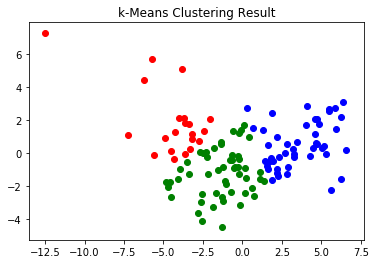

Cluster lengths = [21, 47, 53]
Cluster variances = [2.2906670398024636, 2.003884762967925, 1.9491271574839164]


In [19]:
clusters = kMeans(X2.T, 3);
makeScatterPlot('k-Means Clustering Result',clusters,['r','b','g']);
print ("Cluster lengths = {}".format([len(cluster) for cluster in clusters]));
print("Cluster variances = {}".format(ClusterVariance(clusters)));

## Gaussian Mixture Model (Bill Lee)

Here we perform GMM clustering on the data. The three clusters come out very uneven, and in some runs one cluster vanishes entirely. This causes a large variance in cluster size and shape.

In [51]:
from scipy.stats import multivariate_normal

def computePi(probability_matrix,j):
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return total_col/probability_matrix.shape[0]

def computeMu(probability_matrix,dataset,j):
    total_px = np.zeros((1,dataset.shape[1]))
    for i in range(len(dataset)):
        total_px += (probability_matrix[i][j]*dataset[i])
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return total_px/total_col

def computeCov(probability_matrix,dataset,j,mu):
    total_cov = np.zeros((dataset.shape[1],dataset.shape[1]))
    for i in range(len(dataset)):
        xMinusMean = dataset[i] - mu
        total_cov += probability_matrix[i][j]*(xMinusMean.T@xMinusMean)
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return (1/total_col)*(total_cov)  

def parent_pdf(datapoint,Pi,Mu,Cov,numberOfClusters):
    # Computes the f_X(x)
    total = 0
    for j in range(numberOfClusters):
        total += Pi[j]*(multivariate_normal.pdf(datapoint, Mu[j], Cov[j], allow_singular=True))
    return total

def Pij_times_fj(Pi_j, Mu_j, Cov_j, j, datapoint):
    return Pi_j*multivariate_normal.pdf(datapoint, mean=Mu_j, cov=Cov_j, allow_singular=True)

def emAlgorithm(dataset,numberOfClusters):
    # Expectation Maximization Algorithm
    
    Pi = [(1/numberOfClusters) for i in range(numberOfClusters)]
    Mu = [10*np.random.rand(dataset.shape[1]) for i in range(numberOfClusters)]
    Sigma = [np.identity(dataset.shape[1]) for i in range(numberOfClusters)]
    
    didNotConverge = True
    probability_matrix = np.zeros((dataset.shape[0],numberOfClusters))
    epsilon = 10
    while didNotConverge:
        Theta = [np.copy(Pi), np.copy(Mu), np.copy(Sigma)]
        didNotConverge = False
        # Estimation
        for i in range(dataset.shape[0]):
            denominator = parent_pdf(dataset[i],Pi,Mu,Sigma,numberOfClusters)
            for j in range(numberOfClusters):
                probability_matrix[i][j] = Pij_times_fj(Pi[j],Mu[j],Sigma[j],j,dataset[i])/denominator
        # Maximization
        for j in range(numberOfClusters):
            Pi[j] = computePi(probability_matrix,j)
            Mu[j] = computeMu(probability_matrix,dataset,j)
            Sigma[j] = computeCov(probability_matrix,dataset,j,Mu[j])
        Mu = np.squeeze(Mu);
        # Check Convergence
        for j in range(numberOfClusters):
            difference = np.linalg.norm(Theta[1][j]-Mu[j])
            if(difference > 0.1):
                didNotConverge = True
    return [Pi, Mu, Sigma]

out = emAlgorithm(X2.T,3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


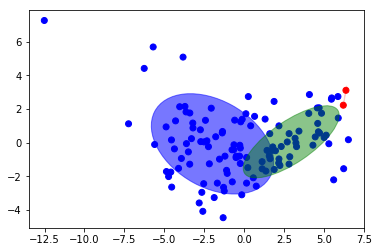

In [52]:
import numpy.linalg as la
import mpl_toolkits.mplot3d
import matplotlib as mpl;
from matplotlib.patches import Ellipse

# Sorting data into clusters
def Gaussian(x, mean, cov, dim) :
    return 1/np.sqrt((2*np.pi)**dim*la.norm(x))*np.exp(-np.matmul(np.matmul(np.transpose(x-mean),la.inv(cov)),x-mean)/2);
labels = [];
for sample in X2.T :
    probs = [];
    for i in range(2) : 
        probs.append(out[0][i]*Gaussian(sample.T, np.reshape(out[1][i],(2,1)), out[2][i], 2));
    labels.append(np.argmax(probs));
print(labels);
colors = ['r' if x==0 else 'b' if x==1 else 'g' for x in labels];

# Plotting clustered data points
xset = X2[0].tolist()[0]
yset = X2[1].tolist()[0]
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(xset,yset,c=colors)

# Plotting ellipses - computing height, weight, angle, and shading
colors = ['r','b','g']
for i in range(3) :
    v, w = la.eigh(out[2][i])
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / la.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(out[1][i], v[0], v[1], 180. + angle, color=colors[i])
    ell.set_clip_box(ax.bbox)
    # Renormalized mu value for alpha so the contrast isn't as sharp
    ell.set_alpha(out[0][i]**(1/3)/2/(.5)**(1/3))
    ax.add_artist(ell)

## Spectral Clustering (Anton Maliev)

Here we perform Spectral Clustering using the built-in methods on scikit-learn. We test the implementation on the full 30D vectors varying two parameters. Changing the kernel method to a nearest-neighbors implementation creates more separation, and the clusters start to resemble those formed through kNN. Changing the label assignment rule to kmeans creates more uneven clusters using the rbf kernel.

rbf Kernel with discretized labels:
Cluster lengths = [54, 34, 33]
Cluster variances = [7.793277361049958, 10.03187077529569, 10.844537532364138]
rbf Kernel with discretized labels:
Cluster lengths = [117, 2, 2]
Cluster variances = [9.573552878034151, 1.6369431820700315, 1.7285947872437952]
rbf Kernel with discretized labels:
Cluster lengths = [52, 24, 45]
Cluster variances = [7.07111078580074, 5.727439721956909, 8.746448888557822]
rbf Kernel with discretized labels:
Cluster lengths = [57, 19, 45]
Cluster variances = [7.373774172218469, 4.655355900999471, 8.842783721580224]


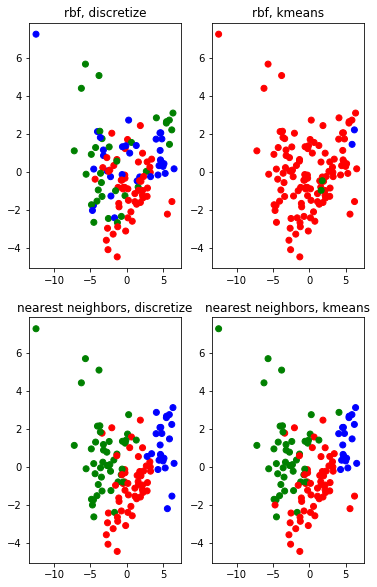

In [26]:
# Run SpectralClustering four times with different params
from sklearn.cluster import SpectralClustering;
sc1 = SpectralClustering(3, n_init=100, assign_labels='discretize', affinity='rbf');
labels1 = sc1.fit(X).labels_;
colors1 = ['r' if x==0 else 'b' if x==1 else 'g' for x in labels1];
clusters1 = [];
# Construct clusters and compute size, variance
for i in range(3) :
    clusters1.append(X[np.ix_(np.where(labels1==i)[0],np.arange(30))]);
print("rbf Kernel with discretized labels:");
print ("Cluster lengths = {}".format([len(cluster) for cluster in clusters1]));
print("Cluster variances = {}".format(ClusterVariance(clusters1)));

sc2 = SpectralClustering(3, n_init=100, assign_labels='kmeans', affinity='rbf');
labels2 = sc2.fit(X).labels_;
colors2 = ['r' if x==0 else 'b' if x==1 else 'g' for x in labels2];
clusters2 = [];
for i in range(3) :
    clusters2.append(X[np.ix_(np.where(labels2==i)[0],np.arange(30))]);
print("rbf Kernel with discretized labels:");
print ("Cluster lengths = {}".format([len(cluster) for cluster in clusters2]));
print("Cluster variances = {}".format(ClusterVariance(clusters2)));

sc3 = SpectralClustering(3, n_init=100, assign_labels='discretize', affinity='nearest_neighbors');
labels3 = sc3.fit(X).labels_;
colors3 = ['r' if x==0 else 'b' if x==1 else 'g' for x in labels3];
clusters3 = [];
for i in range(3) :
    clusters3.append(X[np.ix_(np.where(labels3==i)[0],np.arange(30))]);
print("rbf Kernel with discretized labels:");
print ("Cluster lengths = {}".format([len(cluster) for cluster in clusters3]));
print("Cluster variances = {}".format(ClusterVariance(clusters3)));

sc4 = SpectralClustering(3, n_init=100, assign_labels='kmeans', affinity='nearest_neighbors');
labels4 = sc4.fit(X).labels_;
colors4 = ['r' if x==0 else 'b' if x==1 else 'g' for x in labels4];
clusters4 = [];
for i in range(3) :
    clusters4.append(X[np.ix_(np.where(labels4==i)[0],np.arange(30))]);
print("rbf Kernel with discretized labels:");
print ("Cluster lengths = {}".format([len(cluster) for cluster in clusters4]));
print("Cluster variances = {}".format(ClusterVariance(clusters4)));

# Plot everything in four subplots
fig = plt.figure();
plt.subplots_adjust(top=2);
ax1 = fig.add_subplot(221);
ax1.scatter([X2[0,:]],[X2[1,:]],c=colors1);
ax1.set_title('rbf, discretize');
ax2 = fig.add_subplot(222);
ax2.scatter([X2[0,:]],[X2[1,:]],c=colors2);
ax2.set_title('rbf, kmeans');
ax3 = fig.add_subplot(223);
ax3.scatter([X2[0,:]],[X2[1,:]],c=colors3);
ax3.set_title('nearest neighbors, discretize');
ax4 = fig.add_subplot(224);
ax4.scatter([X2[0,:]],[X2[1,:]],c=colors4);
ax4.set_title('nearest neighbors, kmeans');

# Dataset 3: Exam Results of Students

Note: this dataset was used in place of the Households with Married Couples dataset. We were planning to regress on the number of U.S. households with married couples by year. However, were realized that the dataset was very small (~70 one-dimensional samples), so the result would be easily to predict with maximum possible accuracy by simply using an interpolating polynomial or similar method. Thus we decided on this dataset to run regression on, since it contains 1000 multi-dimensional inputs.

## Preprocessing

This dataset is presented in the form of a csv file with a list of student's exam scores given certain parameters. Our goal for this assignment is to see if we can predict the scores of a student based on these factors. In the preprocessing stage we standardize the data and perform 2D PCA. We also declare some functions that will be useful in regression. One challenge we faced was how to encode some of the non-binary data: race/ethnicity and parents' level of education, which can take on 5 or 6 values respectively. We encoded them as 5-bit and 6-bit strings, so that they could all be equidistant, since we're assuming each of the values are unrelated.

In [33]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

featureLabels = set([
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
])
featureMaps = {}
reverseMaps = {}
featureMaps["gender"] = {
    "male"   : [0],
    "female" : [1]
}
featureMaps["race/ethnicity"] = {
    "group A" : [1, 0, 0, 0, 0],
    "group B" : [0, 1, 0, 0, 0],
    "group C" : [0, 0, 1, 0, 0],
    "group D" : [0, 0, 0, 1, 0],
    "group E" : [0, 0, 0, 0, 1]
}
featureMaps["parental level of education"] = {
    "some high school"   : [1, 0, 0, 0, 0, 0],
    "some college"       : [0, 1, 0, 0, 0, 0],
    "bachelor's degree"  : [0, 0, 1, 0, 0, 0],
    "master's degree"    : [0, 0, 0, 1, 0, 0],
    "high school"        : [0, 0, 0, 0, 1, 0],
    "associate's degree" : [0, 0, 0, 0, 0, 1]
}
featureMaps["lunch"] = {
    "standard"     : [0],
    "free/reduced" : [1]
}
featureMaps["test preparation course"] = {
    "none"      : [0],
    "completed" : [1]
}
for key in featureMaps:
    reverseMaps[key] = {str(v): k for k, v in featureMaps[key].items()}

regressionLabels = set([
    "math score",
    "reading score",
    "writing score"
])

def featuresToVector(features, usedFeatures = None):
    """
    features is a dictionary with keys in featureLabels above
    Takes the features and returns a vector (array of 1's/0's corresponding to it)
    """
    if usedFeatures is None:
        usedFeatures = featureLabels
    result = []
    for label in usedFeatures:
        currMap = featureMaps[label]
        currVal = features[label]
        result += currMap[currVal]
    return result

def vectorToFeatures(v, usedFeatures = None):
    """
    Exactly the reverse of the function above.
    """
    if usedFeatures is None:
        usedFeatures = featureLabels
    result = {}
    vTmp = v
    for label in usedFeatures:
        currMap = featureMaps[label]
        currLen = len(currMap.values()[0])
        currVector = vTmp[:currLen]
        vTmp       = vTmp[currLen:]
        currReverseMap = reverseMaps[label]
        result[label] = currReverseMap[str(currVector)]
    return result

def testFeatureConversions():
    """
    Test to check that feature conversions work (featuresToVector and vectorToFeatures)
    """
    with open('students-performance-in-exams/StudentsPerformance.csv', 'r') as f:
        csvReader = csv.DictReader(f)
        for features in csvReader:
            currVector = featuresToVector(features)
            currFeatures = vectorToFeatures(currVector)
            for label in featureLabels:
                assert features[label] == currFeatures[label]
                
def addOneCol(XOld):
    mOld, nOld = XOld.shape
    X = np.ones( (mOld, nOld + 1) )
    X[:, :-1] = XOld
    return X
                
def calcDataMatrix(usedFeatures = None):
    """
    Returns the X matrix used in linear regression. Adds in the 1 term at the end.
    """
    result = []
    with open('students-performance-in-exams/StudentsPerformance.csv', 'r') as f:
        csvReader = csv.DictReader(f)
        for features in csvReader:
            currVector = featuresToVector(features, usedFeatures)
            result.append(currVector)
    return np.array(result)

def calcOutputVector(label):
    """
    Returns a y vector on label. label can be any value from regressionLabels
    """
    assert label in regressionLabels
    
    result = []
    with open('students-performance-in-exams/StudentsPerformance.csv', 'r') as f:
        csvReader = csv.DictReader(f)
        for features in csvReader:
            result.append(int(features[label]))
    return np.array(result, ndmin=2).T


# Uncomment to test feature conversions
# testFeatureConversions()

# X is the data vector from preprocessing
X = calcDataMatrix()
X = preprocessing.scale(X, axis = 1)
print(X.shape)

(1000, 14)


C:\Users\the_a\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## Utility Functions

In [37]:
def makeScatterPlot(title, pointsLists, colors, markers, xlabel = '', ylabel = ''):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        currMarker = markers[i]
        for point in pointsList:
            x, y = point
            ax.scatter(x, y, c=currColor, marker=currMarker)
        
    # Temporary, add line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = 0 + 1 * x_vals
    plt.plot(x_vals, y_vals, '--')
    
    # plt.xlim(0, 100)
    # plt.ylim(0, 100)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def calcError(y1, y2):
    return abs(y1 - y2)

def KCVsplit(k, X, y):
    """
    Splits the training data (X) into k folds in which one fold is used for testing
    and all the others are used for training. Does this k times. 
    
    :param int k
    :param np.array X
    :param np.array y
    :return: (folds, Xlist, ylist, table) where folds is a list of all 
             the folds, Xlist is a list of np.arrays
             corresponding to the X used for training in each iteration 
             (all the folds except for index i),
             ylist is a list of np.arrays corresponding to the y used for training
             and table is a hash table mapping rows in X to their corresponding
             label y.
    :rtype: tuple of (list of np.array, np.array, np.array, dict)
    """
    Xlist = []
    ylist = []
    table = {}
    
    # Set table up
    for i, row in enumerate(X):
        table[str(row)] = y[i]
    
    # Split X up into folds
    stepSize = int(X.shape[0] / k) + 1
    steps = [min(X.shape[0], stepSize * n) for n in range(1, k)]
    folds = np.split(X, steps)
    foldLabels = np.split(y, steps)
    
    for i, currFold in enumerate(folds):
        # Get XTrain and yTrain with all the other folds except currFold
        otherFolds = [otherFold for j, otherFold in enumerate(folds) if j != i]
        otherFoldLabels = [label for j, label in enumerate(foldLabels) if j != i]
        XTrain = otherFolds[0]
        yTrain = otherFoldLabels[0]
        for j in range(1, len(otherFolds)):
            XTrain = np.append(XTrain, otherFolds[j], axis=0)
            yTrain = np.append(yTrain, otherFoldLabels[j], axis=0)
        Xlist.append(XTrain)
        ylist.append(yTrain)
    
    return (folds, Xlist, ylist, table)

def performValidation(k, X, y, model, plotDiffs = False):
    """
    Performs cross validation
    """
    folds, Xlist, ylist, table = KCVsplit(k, X, y)
    
    # For each fold i, use i as testing, and use all the other
    # i - 1 folds for training. Calculate the errors for each and store
    # them in avgErrors
    predTable = {}
    avgErrors = []
    for i in range(len(Xlist)):
        currFold = folds[i]
        XTrain = Xlist[i]
        yTrain = ylist[i]
        
        # Train the model
        model.fit(XTrain, yTrain)
        
        # Now, evaluate the trained model against the actual labels,
        # keep track of total error!
        totalError = 0
        for row in currFold:
            
            # Get the current predicted value
            currRow = row.reshape(1, -1)
            yPredicted = model.predict(currRow)
            
            totalError += calcError(yPredicted[0], table[str(row)][0])
            predTable[str(row)] = yPredicted
        totalError /= len(currFold)
        avgErrors.append(totalError)
          
    predictions = []
    actuals = []
    plotPoints = []
    for row in X:
        hashVal = str(row)
        predictions.append(predTable[hashVal][0])
        actuals.append(table[hashVal][0])
    plotPoints = [(predictions[i], actuals[i]) for i in range(len(actuals))]

    # Optionally, plot the measured vs predicted values
    if plotDiffs:
        makeScatterPlot("Measured vs Predicted", 
                        [plotPoints], 
                        ['r'], 
                        ['.'],
                        'Predicted',
                        'Actual')
    return avgErrors

def calcRegParameter(modelConstructor, vals, k, X, y, *argv):
    """
    Calculates the best regularization parameter (specified in kwargs) for the 
    model whose constructor is passed in as modelConstructor.
    from the discretized values present in vals.
    Does this by k-fold cross validation on X and y.
    Returns a dictionary mapping each value in argv to the best value for it.
    """
    result = {}
    for key in argv:
        minError = float('inf')
        minVal = float('inf')
        for val in vals:
            folds, XOuterList, yOuterList, table = KCVsplit(k, X, y)
            # Do k-fold CV on the current X and y (which leaves one out)
            for i in range(len(XOuterList)):
                Xcurr = XOuterList[i]
                ycurr = yOuterList[i]
                model = modelConstructor(**{key:val})
                avgErrors = performValidation(k, Xcurr, ycurr, model, plotDiffs = False)
                
                # Update best lambda value if needed
                currError = np.mean(avgErrors)
                if currError < minError:
                    minError = currError
                    minVal = val
        result[key] = minVal
    return result
    

## Least Squares Regression (Lester Fan)

Here we perform least-squares regression on the 2D data features. We manage to predict students' test results with a 10-point average error.

Performing cross validation for regression on math score.


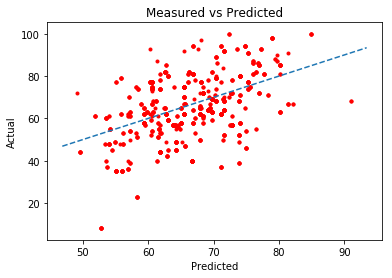

The model coefficients are
[[-122.        ]
 [-121.        ]
 [-120.        ]
 [-119.        ]
 [-118.        ]
 [  20.        ]
 [  22.        ]
 [  23.        ]
 [  23.5       ]
 [  20.5       ]
 [  22.5       ]
 [ -42.        ]
 [ -47.        ]
 [ -48.        ]
 [ 102.62249637]]
The average prediction error is 10.737490280833
Performing cross validation for regression on reading score.


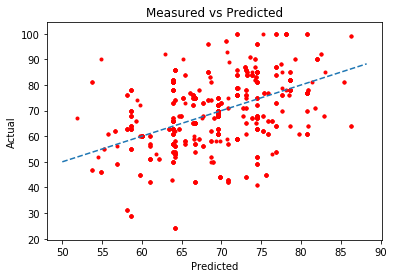

The model coefficients are
[[-14.        ]
 [-12.        ]
 [-12.        ]
 [-12.        ]
 [-12.        ]
 [-22.        ]
 [-22.        ]
 [-21.        ]
 [-18.5       ]
 [-22.        ]
 [-21.        ]
 [-12.5       ]
 [-14.5       ]
 [-19.        ]
 [ 65.31104566]]
The average prediction error is 10.067111465616211
Performing cross validation for regression on writing score.


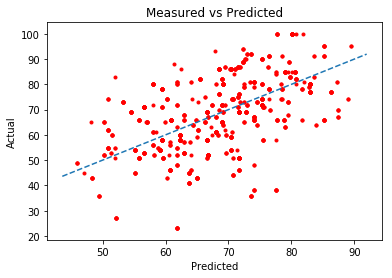

The model coefficients are
[[  5.        ]
 [  7.5       ]
 [  7.        ]
 [  8.5       ]
 [  8.        ]
 [-38.5       ]
 [-36.        ]
 [-35.        ]
 [-34.        ]
 [-38.        ]
 [-36.        ]
 [-10.        ]
 [-11.5       ]
 [-18.        ]
 [ 54.89913036]]
The average prediction error is 10.394031920919945


In [38]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

class LSModel(object):
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None
        self.coef_ = None
        
    def LSTrain(self, X, y):
        # Calculate w = (X^tX)^{-1}X^tY and return it
        w = np.matmul(
                np.linalg.inv(np.matmul(X.T, X)),
                np.matmul(X.T, y)
        )
        return w
    
    def fit(self, X, y):
        self.X = addOneCol(X)
        self.y = y
        self.w = self.LSTrain(self.X, self.y)
        self.coef_ = self.w
        
    def predict(self, x):
        xNew = addOneCol(x).T
        result = [0]
        result = np.matmul(
            self.w.T,
            xNew
        )
        return result

# Set this to true to use scikit learn.
useScikit = False
k = 5
for label in regressionLabels:
    print("Performing cross validation for regression on {}.".format(label))
    y = calcOutputVector(label)
    if useScikit:
        model = LinearRegression()
    else:
        model = LSModel()
    model.fit(X, y)
    avgErrors = performValidation(k, X, y, model, plotDiffs = True)
    finalAvgError = np.mean(avgErrors)
    print("The model coefficients are")
    print(model.coef_)
    print("The average prediction error is {}".format(finalAvgError))


## Ridge Regression (Bill Lee)

Here we perform ridge regression, which is similar to least-squares but with a penalty parameter. We reduce the error down below 10 in the best case.

Performing cross validation for regression on math score.
Best lambda value is 0.05128205128205128


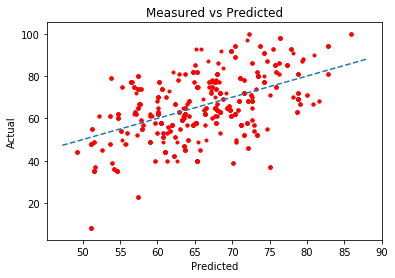

The model coefficients are
[[-4.52205382]
 [-3.87176994]
 [-3.68240491]
 [-2.57801278]
 [-0.70659176]
 [ 1.76064959]
 [ 3.0336322 ]
 [ 4.69590597]
 [ 4.47160149]
 [ 1.93379394]
 [ 3.71940787]
 [ 2.45656511]
 [-2.05759385]
 [-4.65312913]
 [70.26188355]]
The average prediction error is 10.502466679943213
Performing cross validation for regression on reading score.
Best lambda value is 0.05128205128205128


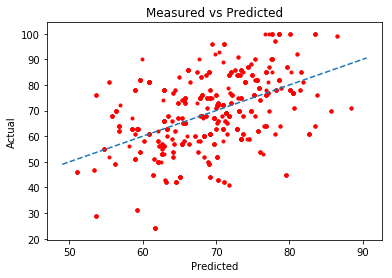

The model coefficients are
[[ 2.12416803]
 [ 2.25769099]
 [ 2.6935812 ]
 [ 3.40803141]
 [ 4.07788515]
 [-4.4662024 ]
 [-3.58897565]
 [-1.71346783]
 [-1.35093902]
 [-4.46367351]
 [-2.72640697]
 [ 3.47198296]
 [ 3.11876914]
 [-2.8424435 ]
 [65.92065307]]
The average prediction error is 9.799898452774917
Performing cross validation for regression on writing score.
Best lambda value is 0.05128205128205128


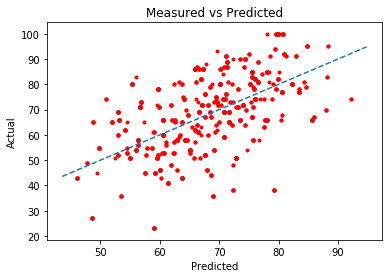

The model coefficients are
[[ 3.09953179]
 [ 3.48577284]
 [ 3.99020743]
 [ 5.28761552]
 [ 5.07874691]
 [-6.45987196]
 [-4.84606201]
 [-2.54458625]
 [-2.40659324]
 [-6.19083238]
 [-4.05141726]
 [ 4.70287039]
 [ 4.06915938]
 [-3.21454115]
 [63.02879661]]
The average prediction error is 10.086717997627385


In [39]:
class RRModel(object):
    def __init__(self, L = 1):
        self.X = None
        self.y = None
        self.w = None
        self.L = L
        self.coef_ = None
        
    def RRTrain(self, X, y, L):
        # Calculate Xmult = X^tX + L*I
        Xmult = np.matmul(X.T, X)
        for i in range(Xmult.shape[0]):
            Xmult[i][i] += L
            
        # Calculate w = (X^tX + L*I)^{-1}X^tY and return it
        w = np.matmul(
                np.linalg.inv(Xmult),
                np.matmul(X.T, y)
        )
        return w

    def fit(self, X, y):
        self.X = addOneCol(X)
        self.y = y
        self.w = self.RRTrain(self.X, self.y, self.L)
        self.coef_ = self.w
        
    def predict(self, x):
        xNew = addOneCol(x).T
        result = [0]
        result = np.matmul(
            self.w.T,
            xNew
        )
        return result
    
# Set this to true to use scikit learn.
useScikit = False
vals = np.linspace(0, 2, num = 40)
k = 5
for label in regressionLabels:
    print("Performing cross validation for regression on {}.".format(label))
    y = calcOutputVector(label)
    if useScikit:
        model = LinearRegression()
    else:
        Lbest = calcRegParameter(RRModel, vals, k, X, y, "L")["L"]
        print("Best lambda value is {}".format(Lbest))
        model = RRModel(L = Lbest)
    avgErrors = performValidation(k, X, y, model, plotDiffs = True)
    finalAvgError = np.mean(avgErrors)
    print("The model coefficients are")
    print(model.coef_)
    print("The average prediction error is {}".format(finalAvgError))
    

## Lasso Regression (Anton Maliev)

Here we perform lasso regression, which also shows an improvement in average error compared to least-squares.

Performing cross validation for regression on math score.
The best alpha value is 0.01


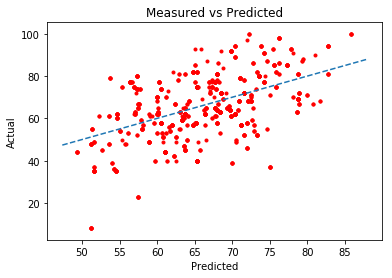

The model coefficients are
[-0.81304631 -0.1792603   0.          1.09930921  2.96870826 -1.26483353
 -0.          1.64903838  1.41237191 -1.0934906   0.6775546   2.56158156
 -1.932351   -4.53270869]
The average prediction error is 10.505157241327097
Performing cross validation for regression on reading score.


C:\Users\the_a\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The best alpha value is 0.01


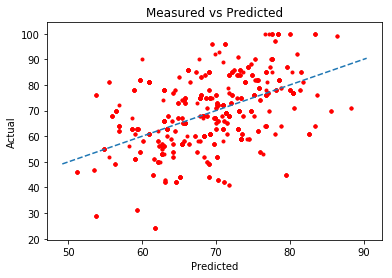

The model coefficients are
[-0.55485299 -0.43137885 -0.          0.705832    1.37113195 -1.72894874
 -0.85159459  1.00067993  1.35539505 -1.72680946  0.          3.64738528
  3.29121154 -2.6510797 ]
The average prediction error is 9.801894048738282
Performing cross validation for regression on writing score.
The best alpha value is 0.01


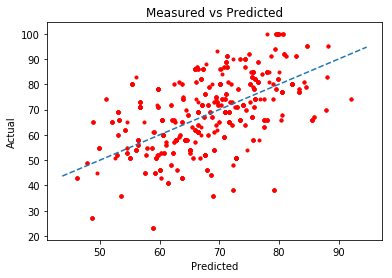

The model coefficients are
[-0.87672966 -0.50002539 -0.          1.28951602  1.0757072  -2.39838664
 -0.78378055  1.49365513  1.62478341 -2.1291204   0.          4.97486649
  4.33630474 -2.92655342]
The average prediction error is 10.088163142406362


In [40]:
from sklearn import linear_model

# Use scikit learn for this since we did not learn a closed-form solution in class.
vals = np.linspace(0.01, 2, num = 40)
k = 5
for label in regressionLabels:
    print("Performing cross validation for regression on {}.".format(label))
    y = calcOutputVector(label)
    alphaBest = calcRegParameter(linear_model.Lasso, vals, k, X, y, "alpha")["alpha"]
    print("The best alpha value is {}".format(alphaBest))
    model = linear_model.Lasso(alpha = alphaBest)
    avgErrors = performValidation(k, X, y, model, plotDiffs = True)
    print("The model coefficients are")
    print(model.coef_)
    finalAvgError = np.mean(avgErrors)
    print("The average prediction error is {}".format(finalAvgError))